In [1]:
%load_ext autoreload
%autoreload 2

# Prior factory & Model Builder

## Prior factory
Generates the prior (more precisely, the hyperparameters) from a `DMSData` instance. Currently handles two phenotypes. The user should supply the pertinent variable names.

## Model builder
Generates the six models as described in the paper from a `PriorFactory` instance. It has the workhorse function `run_cosmos` that persists the likelihood of each model for each group. The likelihoods are persisted to the `data_path` for downstream analyses.

In [2]:
import pandas as pd

from cosmos import DMSData, PriorFactory, ModelBuilder

In [3]:
# Load the data

pheno1, pheno2 = "abundance", "surface2"
no_s_hat = False
s_hat_flag = "no_s_hat" if no_s_hat else "s_hat"

df = pd.read_csv(f"data/kir21_effect_{pheno1}_{pheno2}.csv")

data_obj = DMSData(
    df,
    [pheno1, pheno2],
    include_type=["missense"],
    exclude_type=[
        "synonymous",
        "insertion1",
        "insertion2",
        "insertion3",
        "deletion1",
        "deletion2",
        "deletion3",
    ],
    min_num_variants_per_group=10,
)

The prior factory also has a builtin plotting function.

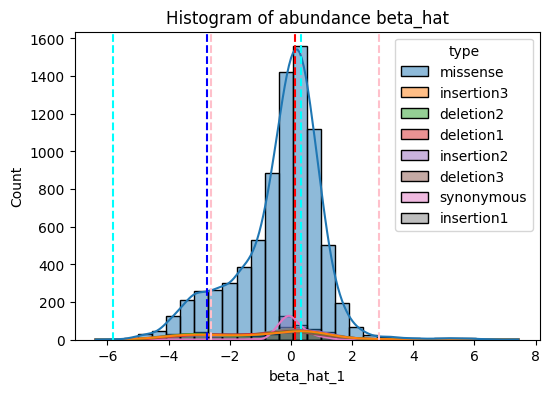

In [4]:
# Estimate the prior hyperparameters
prior = PriorFactory(
    data_obj,
    x_name="beta_hat_1",
    y_name="beta_hat_2",
    x_se_name="se_hat_1",
    x_gmm_n_components=2,
)
_ = prior.plot_histogram_with_gmm()

In [ ]:
# Build the model
model = ModelBuilder(prior, "../test/results/")

Running `Cosmos` on each position takes non-trivial time, and the user can attempt to skip the execution `run_cosmos` on a certain group if some result file already exists.

In [ ]:
# 50 positions took ~25 minutes when testing on a local machine

for i in range(1, 50 + 1):  # Limit the number of groups for testing
    print(f"Running position {i}...", end="\r")
    model.run_cosmos(
        i,
        no_s_hat=no_s_hat,
        suppress_pareto_warning=True,
    )